# 西安火锅团购数据分析报告
## 姓名：王宝琪   学号：22210980075   
***


## 1. 数据读入

In [1]:
#导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import jieba
import jieba.analyse
import wordcloud
import os
import collections
import warnings
import squarify
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']#中文字体正常显示
plt.rcParams['axes.unicode_minus']=False#负号正常显示
pd.set_option('display.max_columns', None)#显示所有列

In [2]:
data=pd.read_excel("Data.xlsx")#导入所给数据
data.info()#简单查看数据集情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             2688 non-null   int64  
 1   字段1                            2688 non-null   object 
 2   字段2                            2688 non-null   object 
 3   discount                       2688 non-null   float64
 4   price                          2688 non-null   float64
 5   privilege.for.new              2688 non-null   object 
 6   privilege.on.sale              2688 non-null   object 
 7   district                       2688 non-null   object 
 8   if.nonworkdays.available       2688 non-null   object 
 9   time.duration                  2688 non-null   float64
 10  if.appointment.needed          2688 non-null   object 
 11  WiFi.available                 2688 non-null   object 
 12  parking                        2688 non-null   o

## 2.1 将季均销量转化为对数

In [3]:
data["对数季均销量"]=np.log(data["quarterly.sales.volume"]+1)#这里取对数应该加1，否则会出现负无穷

data["对数季均销量"].head()

0    1.858899
1    7.536470
2    6.147952
3    1.176188
4    2.007330
Name: 对数季均销量, dtype: float64

## 2.2 绘制直方图

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

(array([477., 268., 235., 220., 248., 201., 186., 191., 155., 138., 120.,
         73.,  58.,  42.,  23.,  16.,  10.,  13.,   8.,   6.]),
 array([ 0.        ,  0.50818175,  1.01636351,  1.52454526,  2.03272702,
         2.54090877,  3.04909052,  3.55727228,  4.06545403,  4.57363578,
         5.08181754,  5.58999929,  6.09818105,  6.6063628 ,  7.11454455,
         7.62272631,  8.13090806,  8.63908981,  9.14727157,  9.65545332,
        10.16363508]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '对数季均销量直方图')

Text(0.5, 0, '对数季均销量')

Text(0, 0.5, '计数')

<AxesSubplot:>

(array([179., 188., 238., 241., 281., 264., 323., 270., 228., 134., 139.,
         52.,  40.,  43.,  37.,   8.,   9.,   8.,   2.,   4.]),
 array([1.0000e+00, 5.8100e+01, 1.1520e+02, 1.7230e+02, 2.2940e+02,
        2.8650e+02, 3.4360e+02, 4.0070e+02, 4.5780e+02, 5.1490e+02,
        5.7200e+02, 6.2910e+02, 6.8620e+02, 7.4330e+02, 8.0040e+02,
        8.5750e+02, 9.1460e+02, 9.7170e+02, 1.0288e+03, 1.0859e+03,
        1.1430e+03]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '团购在线天数直方图')

Text(0.5, 0, '在线天数')

Text(0, 0.5, '计数')

<AxesSubplot:>

(array([  7.,   5.,   1.,   1.,   5.,  12.,  22.,  43.,  55.,  91., 131.,
        187., 159., 286., 287., 519., 335., 433.,  67.,  42.]),
 array([0.01428571, 0.06352143, 0.11275714, 0.16199286, 0.21122857,
        0.26046429, 0.3097    , 0.35893571, 0.40817143, 0.45740714,
        0.50664286, 0.55587857, 0.60511429, 0.65435   , 0.70358571,
        0.75282143, 0.80205714, 0.85129286, 0.90052857, 0.94976429,
        0.999     ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, '折扣情况直方图')

Text(0.5, 0, '折扣')

Text(0, 0.5, '计数')

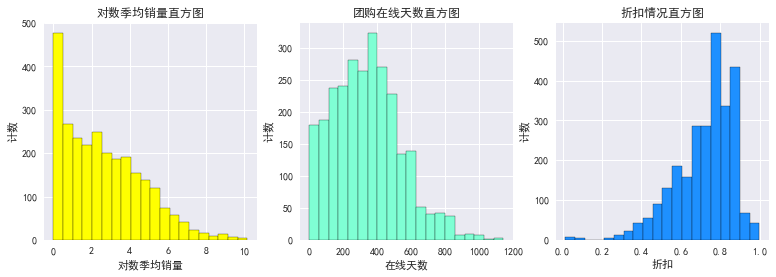

In [4]:
plt.style.use('seaborn')
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

plt.figure(figsize=(13,4))
plt.subplot(131)
plt.hist(data["对数季均销量"],bins=20,color='yellow',edgecolor='black')
plt.title("对数季均销量直方图")
plt.xlabel('对数季均销量')
plt.ylabel('计数')

plt.subplot(132)
plt.hist(data["online.intervel"],bins=20,color='aquamarine',edgecolor='black')
plt.title("团购在线天数直方图")
plt.xlabel('在线天数')
plt.ylabel('计数')
plt.subplot(133)
plt.hist(data["discount"],bins=20,color='dodgerblue',edgecolor='black')
plt.title("折扣情况直方图")
plt.xlabel("折扣")
plt.ylabel("计数")


1. 题目中要求的三幅直方图如上三图所示。其中第一幅图是火锅团购产品的对数季均销量直方图，通过观察上图可知，对数季均销量在0-0.5之间的产品数目最多，说明有接近500种火锅团购产品的销量比较低。而随着销量的提升，对应产品的数目也随之下降，说明销量越高的火锅团购产品的数目越少，其中对数销量在2-4之间的产品占比较大。  
2. 第二幅图是在线天数的直方图。可以看到，大部分团购产品的在线天数集中在300-500天，在线0-200天的也较多，在线超过600天的产品很少。 
3. 第三幅图是折扣情况的直方图。可以看到，绝大部分的折扣在8折左右，低折扣的数目很少。

## 3. 统计火锅团购店名的词频及绘制词云图

In [5]:
#直接将火锅店名提取出来建立一个txt文件，后期遇到统计出来的词中存在空格，故进行split处理避免空格
#拼接文本
data_name=data['字段1']
data_name=','.join('%s'%id for id in data_name)
data_name2=''.join(data_name.split())
#保存文本文件
data_txt=open('火锅店名.txt','w',encoding='utf8')
data_txt.write(data_name2)
#关闭文件
data_txt.close()

24928

In [6]:
#读取txt文件，进行分词处理并进行词频统计，在文件目录中添加了stopwords.txt文件，其中为需要剔除的无意义词汇，如“路”，“店”，“分店”等
data_txt=open('火锅店名.txt','r',encoding='utf8').read()#读取文本内容
result1=jieba.cut(data_txt)#进行分词处理
keywords=list(result1)#创建列表
stopwords=[line.rstrip() for line in open (r'stopwords.txt','r',encoding='utf8').readlines()]
#读取停用词
keywords2=[d for d in keywords if d not in stopwords]
#去除停用词
c=dict.fromkeys(keywords2,0)
#构建字段，默认值为0
for x in keywords2:
    c[x]+=1
#统计频次
newc=sorted(c.items(),key=lambda x:x[1],reverse=True)

    


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86131\AppData\Local\Temp\jieba.cache
Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


In [7]:
#获取高频词中排名前10的词
word_counts=collections.Counter(keywords2)
word_counts_top10=word_counts.most_common(10)
print(word_counts_top10)

[('串串', 244), ('重庆', 206), ('串串香', 150), ('私房', 137), ('鱼', 133), ('涮', 125), ('自助', 125), ('小火锅', 116), ('焖', 115), ('煲', 77)]


<Figure size 720x1080 with 0 Axes>

(-0.5, 549.5, 339.5, -0.5)

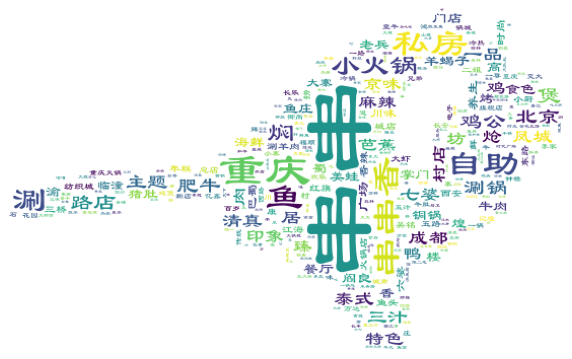

In [8]:
%matplotlib inline
mask=np.array(Image.open('photo.jpg'))#定义词云背景
wc=wordcloud.WordCloud(
background_color='white',
font_path='C:/Windows/Fonts/SIMLI.TTF',#设置字体格式
mask=mask,#设置背景图
max_words=1000,#最多显示词数
max_font_size=100)#字体最大值
wc.generate_from_frequencies(word_counts)#从字典生成词云
plt.figure(figsize=(10,15))
plt.imshow(wc)#显示词云
plt.axis('off')#关闭坐标轴
plt.show()#显示图像

在上面词频统计及词云图中可见，商家店名中出现最高频的词汇为“串串”，“涮”，“小火锅”，“重庆”等。说明顾客在购买火锅团购产品时比较青睐重庆火锅，串串香，自助，私房等形式及口味的火锅，充分符合当今中国人对火锅口味的喜好，也符合四川，重庆火锅非常受欢迎的事实。

## 4.1火锅销量与团购价格箱线图

In [9]:
def divide_price(x):#通过观察可知，大部分火锅团购产品的售价集中在下面五个区间内，故将价格分为五个区间段以便绘制箱线图
    if x<=50:
        return '0`50'
    elif 50<x<=100:
        return '50`100'
    elif 100<x<=150:
        return '100~200'
    elif 150<x<=200:
        return '200~300'
    elif x>200:
        return '300以上'


data['价格分段']=data['price'].apply(divide_price)

Text(0.5, 1.0, '销量与价格区间箱线图')

Text(0.5, 0, '火锅团购产品各价格区间')

Text(0, 0.5, '火锅团购产品对数季均销量')

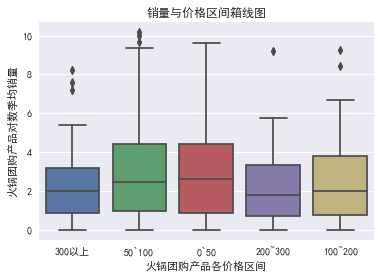

In [10]:
a1=sns.boxplot(x=data["价格分段"], y=data["对数季均销量"],data=data)
a1.set_title('销量与价格区间箱线图')
plt.xlabel("火锅团购产品各价格区间")
plt.ylabel("火锅团购产品对数季均销量")
plt.show()

上图展示了不同价格区间段的火锅团购产品与对数季均销量的关系。由上图可见，价格在0-50及50-100的销量中位数，最大值，上三分位数均处于较高水平，说明大部分顾客更愿意购买价格在100元以下的火锅团购产品。随着价格的上升，销量也逐渐下降，通过对比可知，200元以上的产品的销量的平均水平明显不如100元以下的产品。300元以上产品的销量中位数要略高于200-300元的产品，我分析可能是顾客青睐更高收费，高质量的产品。

## 4.2 火锅销量与是否节假日通用的箱线图

Text(0.5, 1.0, '销量与是否节假日箱线图')

Text(0.5, 0, '是否周末法定节假日通用')

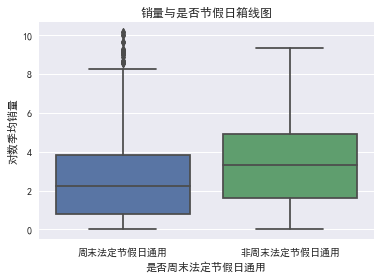

In [11]:
a2=sns.boxplot(x=data["if.nonworkdays.available"], y=data["对数季均销量"],data=data)
a2.set_title('销量与是否节假日箱线图')
plt.xlabel("是否周末法定节假日通用")
plt.show()

由上图可见，非周末法定节假日通用的火锅团购产品的销量最大值，上下四分位数及中位数均高于周末法定节假日通用产品。我的推断可能是因为非周末法定节假日通用的产品在价格，质量，折扣上更好一点，所以顾客更喜欢。

## 5. 店名高频词汇与销量的关系箱线图

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed12d4b850>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed12d4bdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed12d4b580>,
 'medians': [<matplotlib.lines.Line2D at 0x1ed12d5b3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ed12d5b6a0>,
 'means': []}

Text(0.5, 1.0, 'top5高频词汇与销量的关系图')

Text(0.5, 0, 'top5高频词汇')

Text(0, 0.5, '对数季均销量')

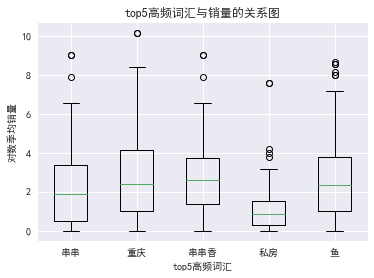

In [12]:
word_counts_top10_lists=['串串','重庆','串串香','私房','鱼','涮','自助','小火锅','焖','煲']#店名中最高频的10个词汇
shop_names = np.array(data["字段1"],dtype='<U20')
name_sales_data = []
for i in word_counts_top10_lists[:5]:
    name_index = np.flatnonzero(np.core.defchararray.find(shop_names,i)!=-1)
    name_sales = np.array(data['对数季均销量'])[name_index]
    name_sales_data.append(name_sales)#提取出词频前5名火锅的销量数据
#下面绘制箱线图
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.boxplot([x for x in name_sales_data],labels=[l for l in word_counts_top10_lists[:5]])
plt.title("top5高频词汇与销量的关系图",fontsize='large')
plt.xlabel('top5高频词汇',fontsize='medium')
plt.ylabel('对数季均销量',fontsize='medium')

上图展示了最高频的5个店名词汇与销量之间的关系。可见，店名包含“重庆”，“串串香”，“鱼”这三个词汇的商家销量的总体水平更高，包含“私房”的商家的销量较低。可知，绝大多数顾客喜欢吃重庆火锅以及串串香和鱼肉火锅，私房火锅销量低的原因可能是价格偏高，折扣低等。